In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('MachineLearinningDataSet.csv')

In [2]:
columns = ['Agriculture, forestry, and fishing, value added (current US$)', 
           'Agricultural land (sq. km)', 
           'Forest area (sq. km)', 
           'Rural population', 
           'Agricultural land (% of land area)', 
           'Arable land (% of land area)', 
           'Agricultural methane emissions (thousand metric tons of CO2 equivalent)', 
           'Land under cereal production (hectares)', 
           'Average precipitation in depth (mm per year)',
           'Cereal production (metric tons)']


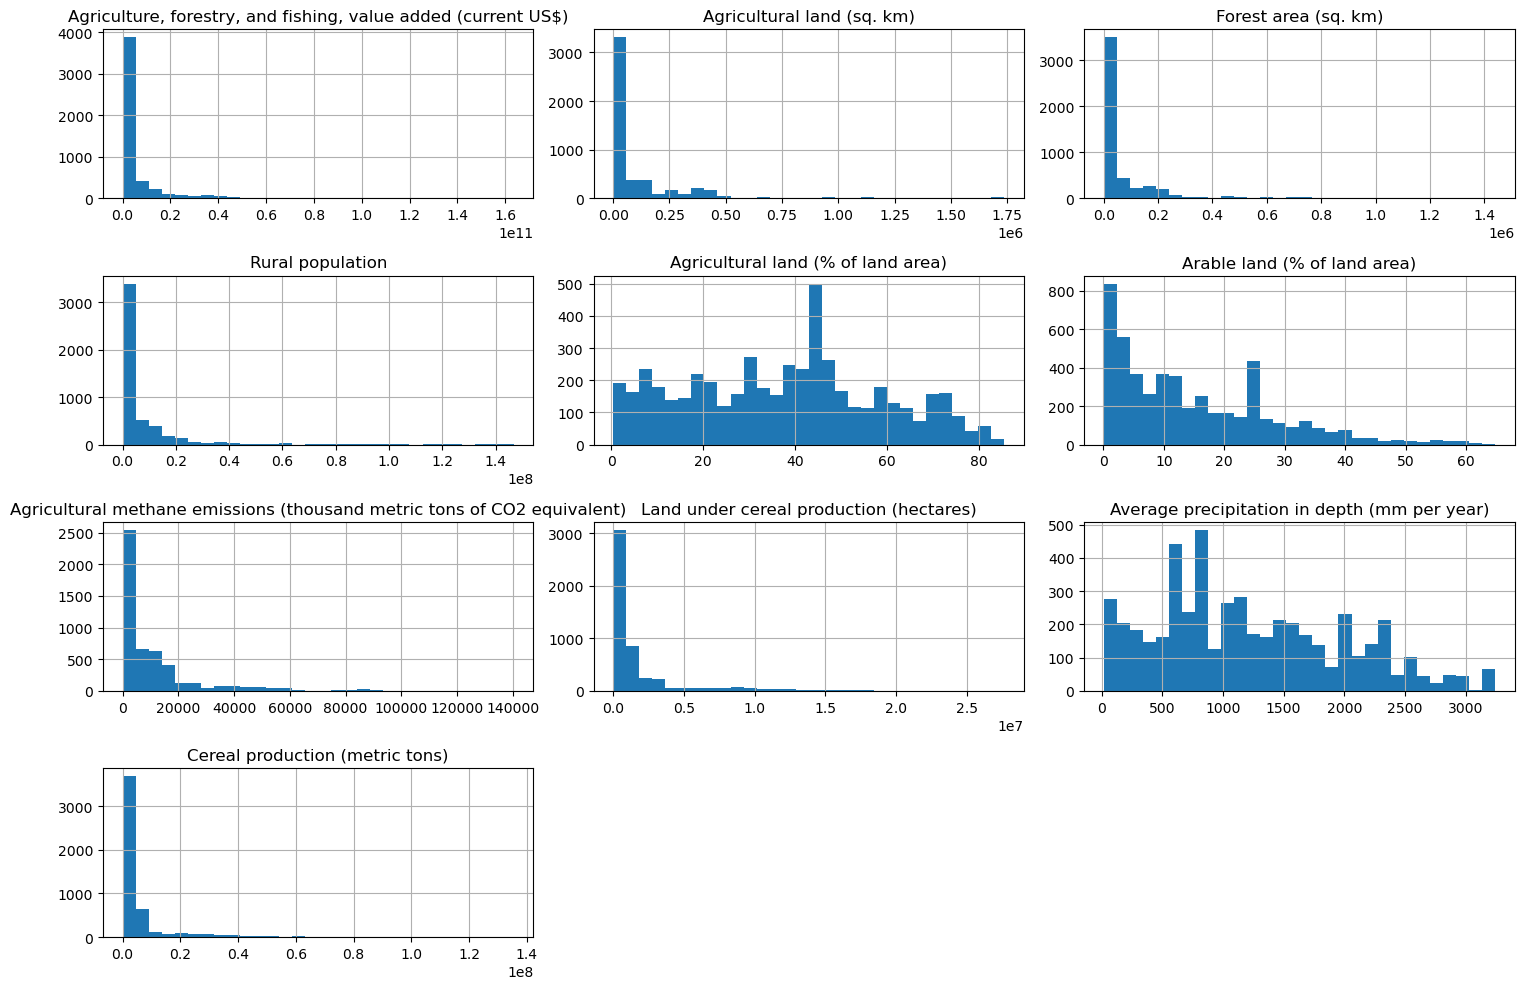

In [8]:
import matplotlib.pyplot as plt

df[columns].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [9]:
# Calculate mean 
means = df[columns].mean()

# Calculate median 
medians = df[columns].median()

# Calculate mode 
modes = df[columns].mode().iloc[0]

summary_df = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes
})

print(summary_df)

                                                            Mean  \
Agriculture, forestry, and fishing, value added...  6.171065e+09   
Agricultural land (sq. km)                          1.207400e+05   
Forest area (sq. km)                                7.938576e+04   
Rural population                                    8.196122e+06   
Agricultural land (% of land area)                  3.763789e+01   
Arable land (% of land area)                        1.503788e+01   
Agricultural methane emissions (thousand metric...  1.078785e+04   
Land under cereal production (hectares)             1.745725e+06   
Average precipitation in depth (mm per year)        1.217026e+03   
Cereal production (metric tons)                     5.564112e+06   

                                                          Median          Mode  
Agriculture, forestry, and fishing, value added...  1.582127e+09  3.319101e+09  
Agricultural land (sq. km)                          2.793279e+04  4.179322e+04  
Forest a

In [5]:
# Calculate standard deviation
stds = df[columns].std()

# Calculate variance
variances = df[columns].var()

summary_df = pd.DataFrame({
    'Standard Deviation': stds,
    'Variance': variances
})

print(summary_df)

                                                    Standard Deviation  \
Agriculture, forestry, and fishing, value added...        1.344829e+10   
Agricultural land (sq. km)                                2.338852e+05   
Forest area (sq. km)                                      1.650609e+05   
Rural population                                          1.781994e+07   
Agricultural land (% of land area)                        2.115686e+01   
Arable land (% of land area)                              1.326186e+01   
Agricultural methane emissions (thousand metric...        1.599446e+04   
Land under cereal production (hectares)                   3.203294e+06   
Average precipitation in depth (mm per year)              7.652142e+02   
Cereal production (metric tons)                           1.189584e+07   

                                                        Variance  
Agriculture, forestry, and fishing, value added...  1.808564e+20  
Agricultural land (sq. km)                         

In [6]:
summary_stats = df[columns].describe(percentiles=[.25, .5, .75])
summary_stats = summary_stats.T

# Select the 25th, 50th, and 75th percentiles
percentile_df = summary_stats[['25%', '50%', '75%']]

print(percentile_df)

                                                             25%  \
Agriculture, forestry, and fishing, value added...  2.515024e+08   
Agricultural land (sq. km)                          1.922500e+03   
Forest area (sq. km)                                1.579693e+03   
Rural population                                    2.218920e+05   
Agricultural land (% of land area)                  2.000000e+01   
Arable land (% of land area)                        3.814996e+00   
Agricultural methane emissions (thousand metric...  1.041862e+03   
Land under cereal production (hectares)             3.249458e+04   
Average precipitation in depth (mm per year)        6.260000e+02   
Cereal production (metric tons)                     1.432298e+05   

                                                             50%           75%  
Agriculture, forestry, and fishing, value added...  1.582127e+09  4.751647e+09  
Agricultural land (sq. km)                          2.793279e+04  1.271169e+05  
Forest a

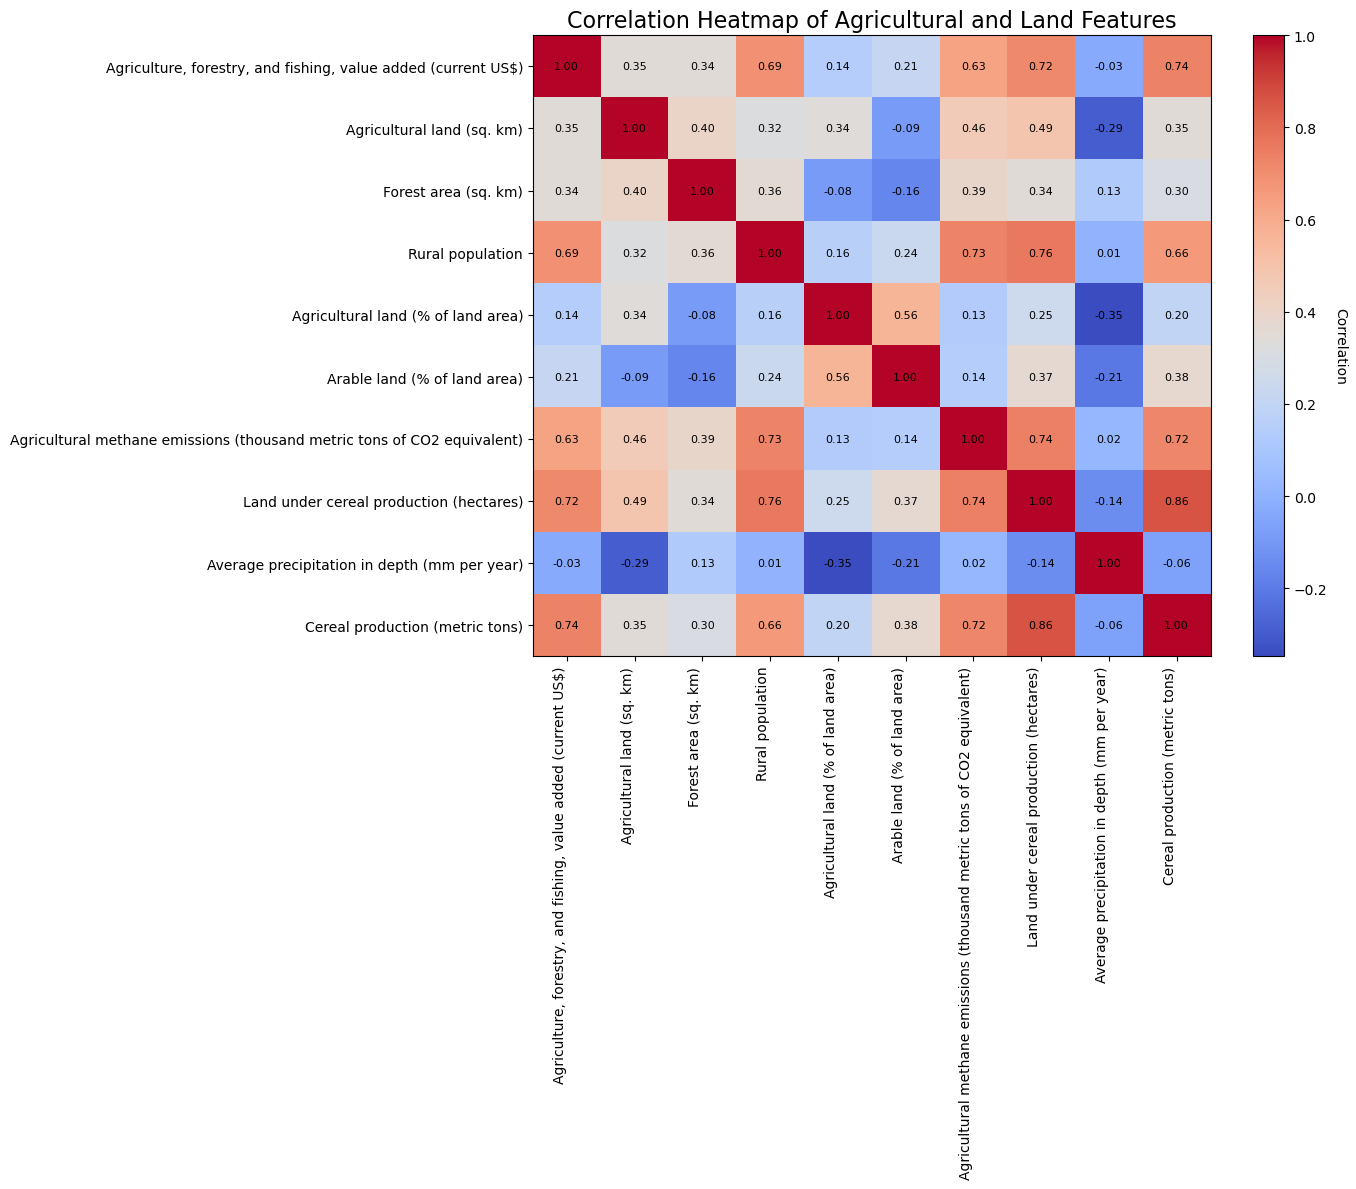

In [7]:
import matplotlib.pyplot as plt

# Compute the correlation matrix for selected columns
corr_matrix = df[columns].corr()

fig, ax = plt.subplots(figsize=(14, 12))

# Create the heatmap
im = ax.imshow(corr_matrix, cmap='coolwarm', aspect='auto')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90, ha='right')
ax.set_yticklabels(corr_matrix.columns)

# Add  values to the cells
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black", fontsize=8)

plt.title("Correlation Heatmap of Agricultural and Land Features", fontsize=16)
plt.tight_layout()
plt.show()